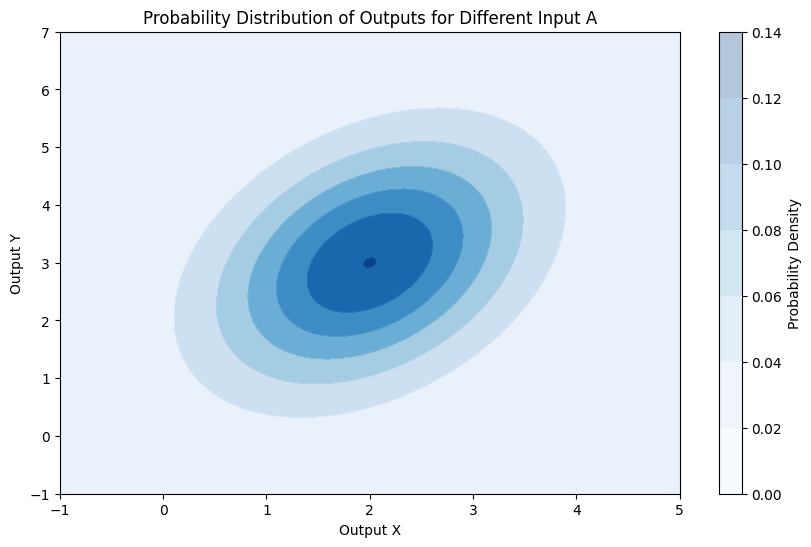

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate synthetic data
np.random.seed(42)
num_samples = 100
a_values = np.linspace(0, 5, num_samples)

# Parameters for the bivariate Gaussian distribution
mean = [2, 3]  # Mean of the distribution
covariance_matrix = [[1, 0.5], [0.5, 2]]  # Covariance matrix

# Create a meshgrid for the heatmap
x, y = np.meshgrid(np.linspace(-1, 5, 100), np.linspace(-1, 7, 100))

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through each value of a
for a in a_values:
    # Generate a bivariate Gaussian distribution for each a
    rv = multivariate_normal(mean, covariance_matrix)
    
    # Calculate the probability density for each (x, y) pair
    pos = np.dstack((x, y))
    z = rv.pdf(pos)
    
    # Plot the heatmap
    plt.contourf(x, y, z, cmap='Blues', alpha=0.3)

# Add labels and title
plt.xlabel('Output X')
plt.ylabel('Output Y')
plt.title('Probability Distribution of Outputs for Different Input A')

# Show the colorbar
cbar = plt.colorbar()
cbar.set_label('Probability Density')

plt.show()


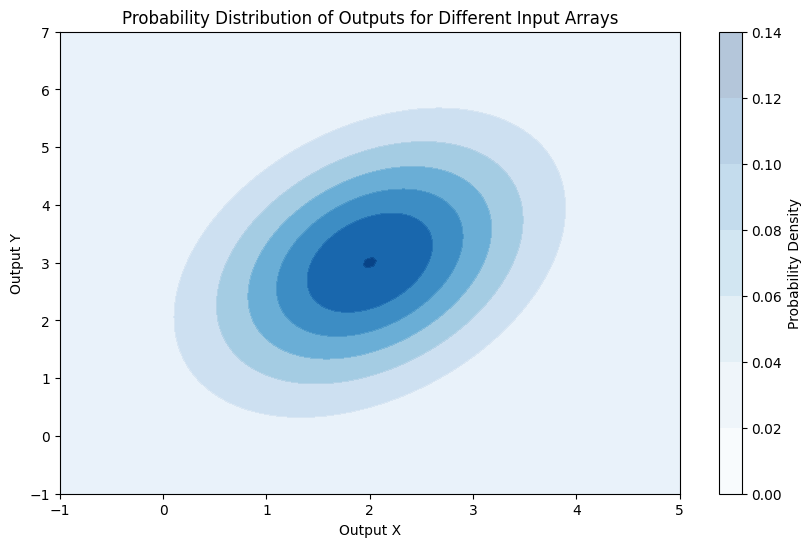

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate synthetic data
np.random.seed(42)
num_samples = 100
input_array = np.random.rand(num_samples, 3, 30)

# Parameters for the bivariate Gaussian distribution
mean = [2, 3]  # Mean of the distribution
covariance_matrix = [[1, 0.5], [0.5, 2]]  # Covariance matrix

# Create a meshgrid for the heatmap
x, y = np.meshgrid(np.linspace(-1, 5, 100), np.linspace(-1, 7, 100))

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through each row of the input array
for input_row in input_array:
    # Generate a bivariate Gaussian distribution for each row
    rv = multivariate_normal(mean, covariance_matrix)
    
    # Calculate the probability density for each (x, y) pair
    pos = np.dstack((x, y))
    z = rv.pdf(pos)
    
    # Plot the heatmap
    plt.contourf(x, y, z, cmap='Blues', alpha=0.3)

# Add labels and title
plt.xlabel('Output X')
plt.ylabel('Output Y')
plt.title('Probability Distribution of Outputs for Different Input Arrays')

# Show the colorbar
cbar = plt.colorbar()
cbar.set_label('Probability Density')

plt.show()


In [15]:
import torch
from torch.distributions import MultivariateNormal

# Assuming mean and covariance matrices for x and y
mean = torch.tensor([2.0, 3.0])
covariance_matrix = torch.tensor([[1.0, 0.5], [0.5, 2.0]])

# Create a multivariate normal distribution
multivariate_distribution = MultivariateNormal(mean, covariance_matrix)

# Generate a single sample
sample = multivariate_distribution.sample()

# Get the probability density of the sample
prob_density = multivariate_distribution.log_prob(sample).exp()

# Display results
print("Generated Sample:")
print(sample)

print("\nProbability Density of the Sample:")
print(prob_density.item())


Generated Sample:
tensor([3.4575, 4.7654])

Probability Density of the Sample:
0.030595073476433754


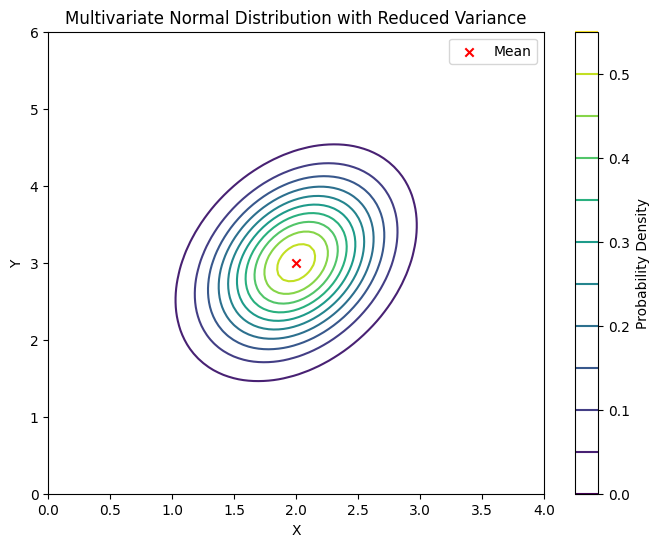

tensor(0.5305)

In [32]:
import torch
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal

# Assuming mean and modified covariance matrices for x and y with reduced variance
mean = torch.tensor([2.0, 3.0])
modified_covariance_matrix = torch.tensor([[0.2, 0.1], [0.1, 0.5]])

# Create a multivariate normal distribution with the modified covariance matrix
multivariate_distribution_modified = MultivariateNormal(mean, modified_covariance_matrix)

# Generate grid points for visualization
x = torch.linspace(0, 4, 100)
y = torch.linspace(0, 6, 100)
X, Y = torch.meshgrid(x, y)
pos = torch.stack((X, Y), dim=-1)

# Evaluate the probability density at each grid point using the modified distribution
prob_density_modified = multivariate_distribution_modified.log_prob(pos).exp()

# Plot the multivariate normal distribution with reduced variance
plt.figure(figsize=(8, 6))
contour = plt.contour(X.numpy(), Y.numpy(), prob_density_modified.numpy(), levels=10, cmap='viridis')
plt.colorbar(contour, label='Probability Density')
plt.scatter(mean[0], mean[1], color='red', marker='x', label='Mean')

plt.title('Multivariate Normal Distribution with Reduced Variance')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

multivariate_distribution_modified.log_prob(mean).exp()


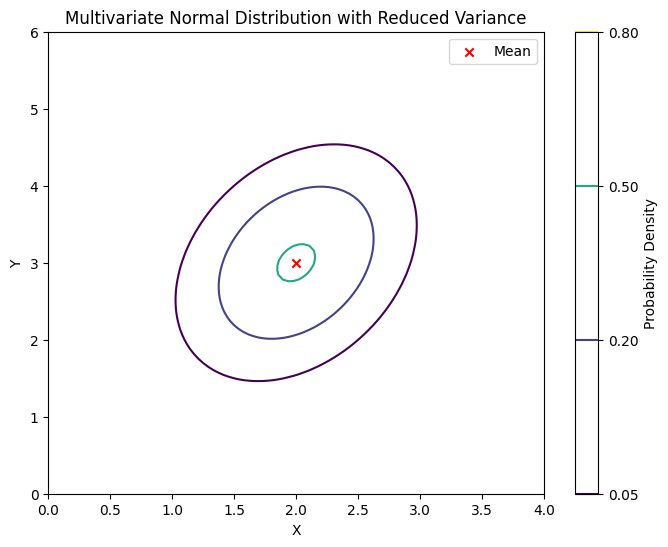

In [33]:
import torch
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal

# Assuming mean and modified covariance matrices for x and y with reduced variance
mean = torch.tensor([2.0, 3.0])
modified_covariance_matrix = torch.tensor([[0.2, 0.1], [0.1, 0.5]])

# Create a multivariate normal distribution with the modified covariance matrix
multivariate_distribution_modified = MultivariateNormal(mean, modified_covariance_matrix)

# Generate grid points for visualization
x = torch.linspace(0, 4, 100)
y = torch.linspace(0, 6, 100)
X, Y = torch.meshgrid(x, y)
pos = torch.stack((X, Y), dim=-1)

# Evaluate the probability density at each grid point using the modified distribution
prob_density_modified = multivariate_distribution_modified.log_prob(pos).exp()

# Specify the probability for the contour lines
probability_thresholds = [0.05, 0.2, 0.5, 0.8]

# Plot the multivariate normal distribution with reduced variance
plt.figure(figsize=(8, 6))
contour = plt.contour(X.numpy(), Y.numpy(), prob_density_modified.numpy(), levels=probability_thresholds, cmap='viridis')
plt.colorbar(contour, label='Probability Density')
plt.scatter(mean[0], mean[1], color='red', marker='x', label='Mean')

plt.title('Multivariate Normal Distribution with Reduced Variance')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import MultivariateNormal

# 가속도 센서 데이터 (임의의 데이터로 대체해야 함)
acceleration_data = torch.randn(1000, 3)

# 실제 터치 좌표 데이터 (임의의 데이터로 대체해야 함)
touch_coordinates = torch.randn(1000, 2)

# 모델 정의
class TouchModel(nn.Module):
    def __init__(self):
        super(TouchModel, self).__init__()
        self.fc = nn.Linear(3, 2)  # 3은 가속도 센서 데이터의 차원, 2는 터치 좌표의 차원

    def forward(self, x):
        return self.fc(x)

# 모델 초기화
model = TouchModel()

# 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습
epochs = 1000

for epoch in range(epochs):
    # 모델 예측
    predicted_coordinates = model(acceleration_data)

    # 손실 계산
    loss = criterion(predicted_coordinates, touch_coordinates)

    # 경사 초기화 및 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 매 100번째 epoch에서 손실 출력
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 학습된 모델로부터 확률 분포 생성
with torch.no_grad():
    model.eval()
    predicted_coordinates = model(acceleration_data)

# 생성된 확률 분포의 평균과 공분산 계산
mean = torch.mean(predicted_coordinates, dim=0)
covariance_matrix = torch.matmul((predicted_coordinates - mean).t(), (predicted_coordinates - mean)) / (predicted_coordinates.size(0) - 1)

# 다변량 정규분포 생성
multivariate_distribution = MultivariateNormal(mean, covariance_matrix)

# 특정 x, y 좌표에 대한 확률 계산
test_point = torch.tensor([[0.0, 0.05]])  # 테스트할 좌표 (임의로 설정)
probability = multivariate_distribution.log_prob(test_point).exp()

print(f'Probability at {test_point.numpy()}: {probability.item()}')


Epoch [100/1000], Loss: 1.2120
Epoch [200/1000], Loss: 1.1163
Epoch [300/1000], Loss: 1.0662
Epoch [400/1000], Loss: 1.0407
Epoch [500/1000], Loss: 1.0280
Epoch [600/1000], Loss: 1.0220
Epoch [700/1000], Loss: 1.0193
Epoch [800/1000], Loss: 1.0181
Epoch [900/1000], Loss: 1.0177
Epoch [1000/1000], Loss: 1.0176
Probability at [[0.   0.05]]: 0.7986629009246826


tensor([[-0.6672, -1.7791,  1.9137],
        [ 0.7503,  0.3239,  0.4513],
        [-0.2741,  0.4133, -1.1988],
        ...,
        [ 0.9272,  0.1449,  0.4166],
        [ 0.0426, -0.0392, -0.9157],
        [-0.0288, -0.1391, -0.5497]])